# Funcion de votacion vía Modelo de Cech
Este notebook invoca el módulo `TDA_Voting` para detectar organismos que aparecen realmente en una muestra de metagenoma 

In [2]:
from TDA_Voting import *
import pandas as pd
import glob
import numpy as np

# Base de datos
#df=pd.read_csv("MapeoReads-2TP-100M-6organims.csv")

# Nombres de archivos
csv_files=[]
for file in glob.glob("/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/*.csv"):
    csv_files.append(file)

In [45]:
csv_files

['/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-TPinsidiosus-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-2TP_michi-nebraskensis-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-2TP_capsici-insidiosus-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-TPmichi-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-TPtessellarius-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-3TP_nebraskensis-sepedonicus-tessellarius-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-2TP_sepedonicus-tessellarius-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta/CSV/MapeoReads-TPnebraskensis-6organims.csv',
 '/home/shaday/GIT/ccm-bioinfomatica-lab/221119Hackaton/tda-meta

A continuación, generamos un diccionario de las subespecies que fueron consideradas en cada uno de los metagenomas estudiados

In [2]:
ref_d = {'sepedonicus':'subsp_sepedonicus_ATCC33113',
 'capsici':'subsp_capsici_1101',
 'insidiosus':'insidiosus_ATCC_10253',
 'michi':'subsp_michi_contigs',
 'nebraskensis':'subsp_nebraskensis_419B',
 'tessellarius':'tessellarius_ATCC_33566'}

Calculamos las votaciones de cada subespecie presente en los datos que constituyen el metagenoma.

In [59]:
# Votaciones
lists_voting=[]
list_of_TP=[]
#organisms=df["Organims"].unique()
for file in csv_files:
    df=pd.read_csv(file)
    df_aux=df.sample(n=int(0.9*(df.shape[0])),replace=True)
    dict_aux=ranking_function_cech(df_aux)
    lists_voting.append(dict_aux)
    list_of_TP.append([ref_d[short_name] for short_name in  getIDnames(file)])

Finalmente, graficamos las funciones de votacion para cada una de estas bases de datos marcando el ranking obtenido por el organismos que sabemos es TP

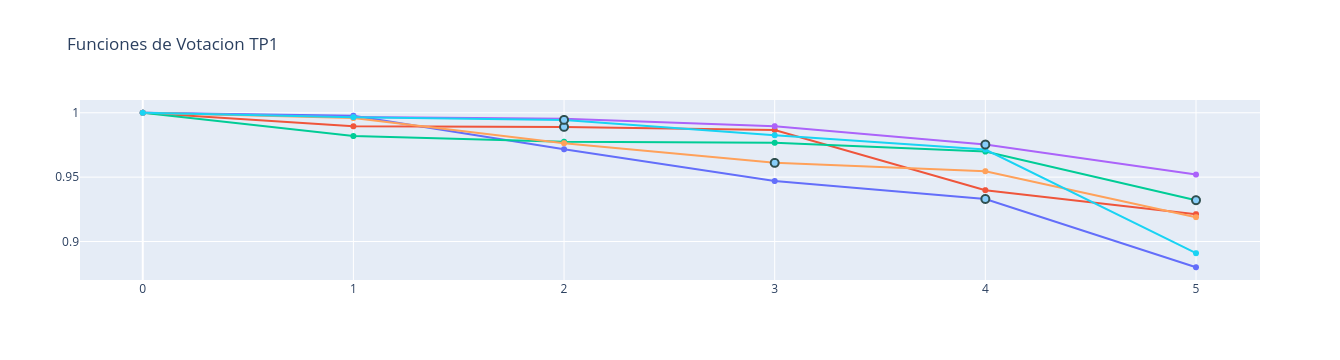

In [60]:
# Graficas TP1
index_TP1=[i for i in range(len(list_of_TP)) if len(list_of_TP[i]) == 1]
list_TP1 = [list_of_TP[i] for i in index_TP1]
list_voting_1=[lists_voting[i] for i in index_TP1]
graph_voting_functions(list_voting_1,list_TP1)

In [48]:
list_TP1

[['insidiosus_ATCC_10253'],
 ['subsp_michi_contigs'],
 ['tessellarius_ATCC_33566'],
 ['subsp_nebraskensis_419B'],
 ['subsp_capsici_1101'],
 ['subsp_sepedonicus_ATCC33113']]

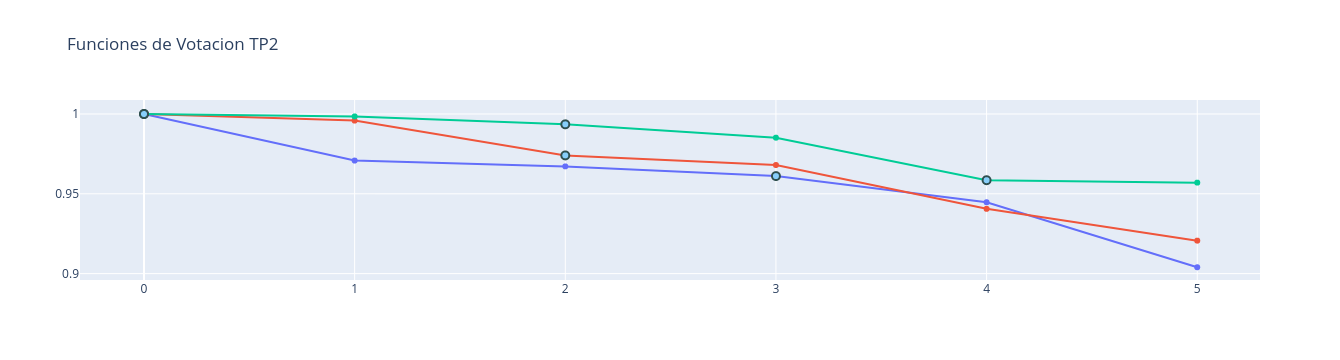

In [49]:
# Graficas TP2
index_TP2=[i for i in range(len(list_of_TP)) if len(list_of_TP[i]) == 2]
list_TP2 = [list_of_TP[i] for i in index_TP2]
list_voting_2=[lists_voting[i] for i in index_TP2]
graph_voting_functions(list_voting_2,list_TP2)

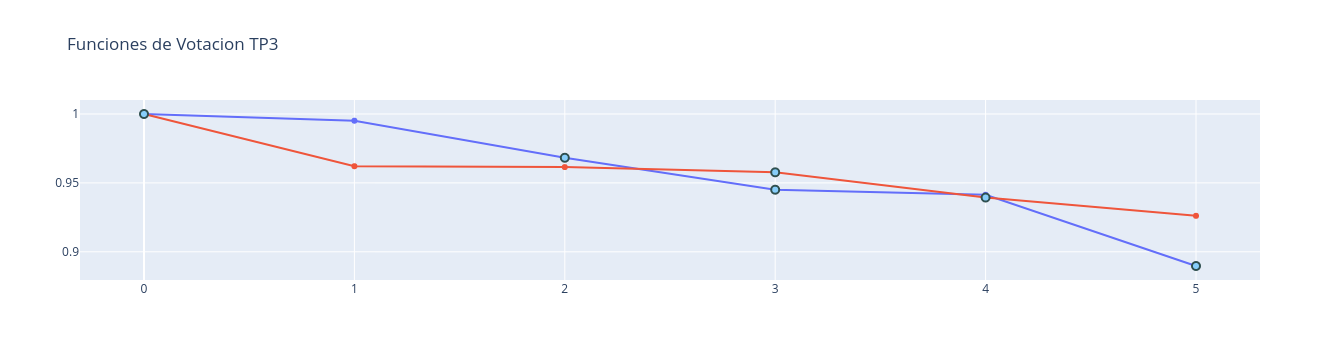

In [50]:
# Graficas TP3
index_TP3=[i for i in range(len(list_of_TP)) if len(list_of_TP[i]) == 3]
list_TP3 = [list_of_TP[i] for i in index_TP3]
list_voting_3=[lists_voting[i] for i in index_TP3]
graph_voting_functions(list_voting_3,list_TP3)

In [51]:
getIDnames('MapeoReads-2TP_capsici-insidiosus-6organims.csv')

['capsici', 'insidiosus']

In [52]:
getIDnames('MapeoReads-3TP_capsici-insidiosus-michi-6organims.csv')

['capsici', 'insidiosus', 'michi']

In [53]:
getIDnames('MapeoReads-TPinsidiosus-6organims.csv ')


['insidiosus']

In [54]:
getIDnames('ROM_1TP_CP019404.csv')

[]

In [55]:
def get_name(file_string):
    tp_list = []
    start=file_string.find('_C')
    end=file_string.find('.',start+1)
    tp_list.append(file_string[start+1:end])
    return tp_list

In [3]:
powerset(range(12))

[(0,),
 (1,),
 (2,),
 (3,),
 (4,),
 (5,),
 (6,),
 (7,),
 (8,),
 (9,),
 (10,),
 (11,),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (7, 8),
 (7, 9),
 (7, 10),
 (7, 11),
 (8, 9),
 (8, 10),
 (8, 11),
 (9, 10),
 (9, 11),
 (10, 11),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 1, 6),
 (0, 1, 7),
 (0, 1, 8),
 (0, 1, 9),
 (0, 1, 10),
 (0, 1, 11),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 2, 6),
 (0, 2, 7),
 (0, 2, 8),
 (0, 2, 9),
 (0, 2, 10),
 (0, 2, 11),
 (0, 3, 4),
 (0, 3, 5),
 (0, 3, 6),
 (0, 3, 7),
 (0, 3, 8),
 (0, 3